In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
scaler = StandardScaler()

In [2]:
data = pd.read_csv('C:/Users/Михаил/Downloads/train.csv')

In [3]:
data.head()


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [4]:
data[data['TotalSpent'] == ' ']

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [5]:
data['TotalSpent'] = data['TotalSpent'].replace(' ')

In [6]:
data['TotalSpent'] = data['TotalSpent'].astype('float')

In [7]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [8]:
missing_data = data.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")

ClientPeriod
False    5282
Name: ClientPeriod, dtype: int64
 
MonthlySpending
False    5282
Name: MonthlySpending, dtype: int64
 
TotalSpent
False    5282
Name: TotalSpent, dtype: int64
 
Sex
False    5282
Name: Sex, dtype: int64
 
IsSeniorCitizen
False    5282
Name: IsSeniorCitizen, dtype: int64
 
HasPartner
False    5282
Name: HasPartner, dtype: int64
 
HasChild
False    5282
Name: HasChild, dtype: int64
 
HasPhoneService
False    5282
Name: HasPhoneService, dtype: int64
 
HasMultiplePhoneNumbers
False    5282
Name: HasMultiplePhoneNumbers, dtype: int64
 
HasInternetService
False    5282
Name: HasInternetService, dtype: int64
 
HasOnlineSecurityService
False    5282
Name: HasOnlineSecurityService, dtype: int64
 
HasOnlineBackup
False    5282
Name: HasOnlineBackup, dtype: int64
 
HasDeviceProtection
False    5282
Name: HasDeviceProtection, dtype: int64
 
HasTechSupportAccess
False    5282
Name: HasTechSupportAccess, dtype: int64
 
HasOnlineTV
False    5282
Name: HasOnlineTV, dtype: in

In [9]:
data.isnull().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [11]:
data.isna().sum(axis = 0)

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

(array([1205.,  565.,  425.,  423.,  388.,  362.,  340.,  364.,  377.,
         833.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <BarContainer object of 10 artists>)

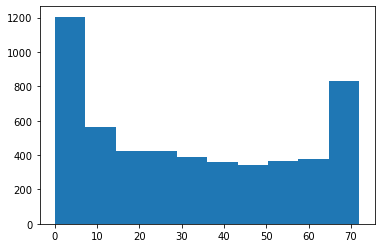

In [12]:
plt.hist(data['ClientPeriod'])

(array([1207.,  142.,  267.,  479.,  350.,  663.,  713.,  659.,  573.,
         229.]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <BarContainer object of 10 artists>)

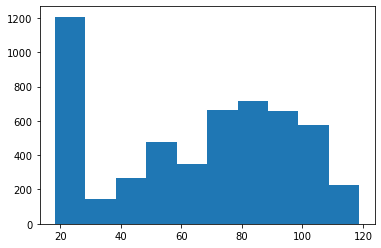

In [13]:
plt.hist(data['MonthlySpending'])

(array([2040.,  901.,  504.,  392.,  344.,  309.,  305.,  223.,  172.,
          92.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <BarContainer object of 10 artists>)

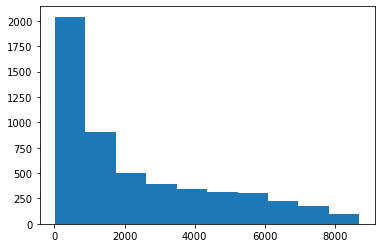

In [14]:
plt.hist(data['TotalSpent'])

In [15]:
for col in range(len(cat_cols)):
    print(data[cat_cols[col]].value_counts(col))
    print(" ")

Male      2655
Female    2627
Name: Sex, dtype: int64
 
0    0.840591
1    0.159409
Name: IsSeniorCitizen, dtype: float64
 
No     0.512117
Yes    0.487883
Name: HasPartner, dtype: float64
 
No     0.695949
Yes    0.304051
Name: HasChild, dtype: float64
 
Yes    0.901363
No     0.098637
Name: HasPhoneService, dtype: float64
 
No                  0.475388
Yes                 0.425975
No phone service    0.098637
Name: HasMultiplePhoneNumbers, dtype: float64
 
Fiber optic    0.443203
DSL            0.340780
No             0.216017
Name: HasInternetService, dtype: float64
 
No                     0.494510
Yes                    0.289474
No internet service    0.216017
Name: HasOnlineSecurityService, dtype: float64
 
No                     0.441499
Yes                    0.342484
No internet service    0.216017
Name: HasOnlineBackup, dtype: float64
 
No                     0.438660
Yes                    0.345324
No internet service    0.216017
Name: HasDeviceProtection, dtype: float64
 
N

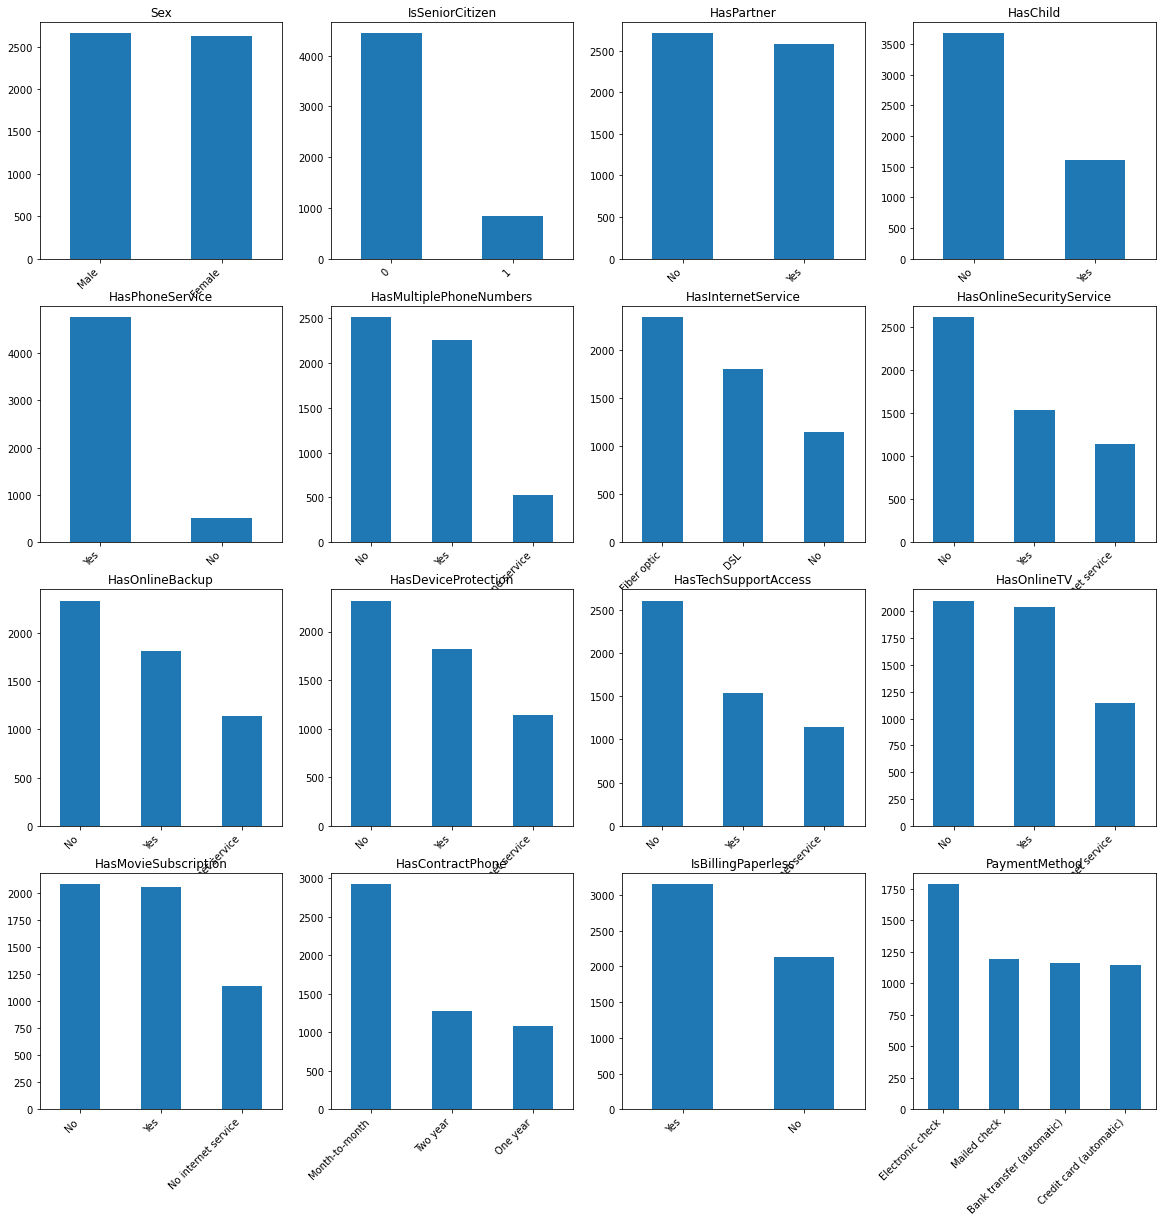

In [16]:
fig = plt.figure(figsize=(20, 20))
for i in range(len(cat_cols)):
    fig.add_subplot(4, 4, i + 1).set_title(cat_cols[i])
    data[cat_cols[i]].value_counts().plot.bar()
    plt.xticks(rotation=45, ha='right')
    

(array([3898.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1384.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

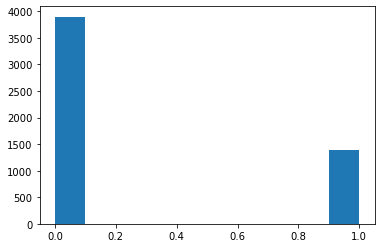

In [17]:
plt.hist(data['Churn'])

In [18]:
data['Churn'].value_counts()
#Можно сказать, что классы сбалансированны

0    3898
1    1384
Name: Churn, dtype: int64

In [19]:
num_cols_scaled = pd.DataFrame(scaler.fit_transform(data[num_cols]))

In [20]:
dummy_features = pd.get_dummies(data[cat_cols])

In [21]:
X = pd.concat([num_cols_scaled, dummy_features], axis=1)
X_origin = data.iloc[:, :-1]
X.head()

,0,1,2,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.920767,-1.505447,-0.557926,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,1.613288,-1.294998,-0.185082,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
2,-1.279005,0.363737,-0.976878,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,-0.016173,0.476418,0.122503,1,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
4,1.124450,1.667856,1.968742,0,1,0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0


In [22]:
y = data[target_col]
X.shape, X_origin.shape

((5282, 45), (5282, 19))

In [23]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)

In [25]:
def search_and_draw(X, y, model, param_name, grid, param_scale, draw=True):
    parameters = {param_name: grid}
        
    CV_model = GridSearchCV(estimator=model, 
                            param_grid=parameters,
                            cv=5, 
                            scoring='roc_auc',
                            n_jobs=-1, 
                            verbose=10,
                            return_train_score = True)
    CV_model.fit(X, y)
    print(CV_model.best_params_)
    means = CV_model.cv_results_['mean_test_score']
    error = CV_model.cv_results_['std_test_score']
    
    if draw:
        plt.figure(figsize=(15,8))
        plt.title('choose '+ param_name)


        if (param_scale == 'log'):
            plt.xscale('log')

        plt.plot(grid, means, label='mean values of score', color='red', lw=3)

        plt.fill_between(grid, means - 2 * error, means + 2 * error, 
                         color='green', label='filled area between errors', alpha=0.5)
        
        legend_box = plt.legend(framealpha=1).get_frame()
        legend_box.set_facecolor("white")
        legend_box.set_edgecolor("black")
        plt.xlabel('parameter')
        plt.ylabel('roc_auc')
        plt.show()
        
    

In [26]:
models = [LogisticRegression()]
param_names = ['C']
grids = [np.array([0.001, 0.01, 0.1, 1, 10, 100])]
param_scales = ['ordinary']

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'C': 10.0}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


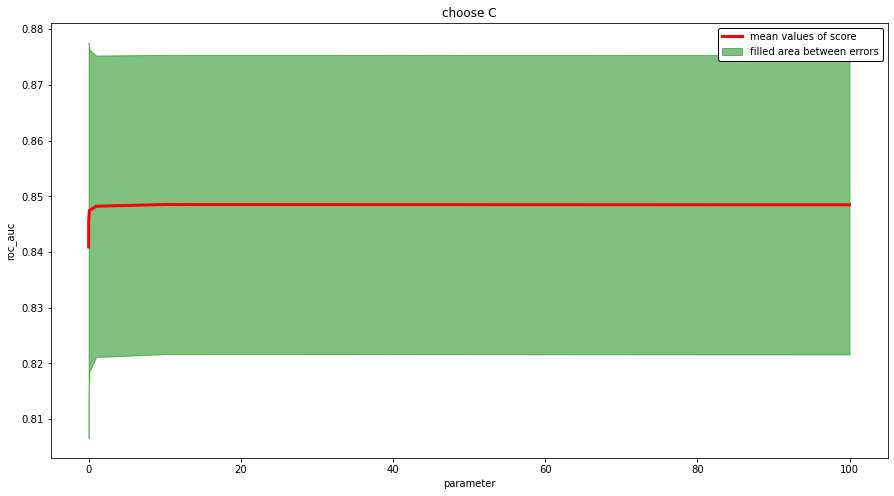

In [27]:
for model, param_name, grid, param_scale in zip(models, 
                                                param_names, 
                                                grids, 
                                                param_scales):
    search_and_draw(X_train, y_train, model, param_name, grid, param_scale)

In [28]:
model = LogisticRegression(C = 10)
model.fit(X_train, y_train)
y_train_predicted = model.predict_proba(X_train)[:, 1]
y_test_predicted = model.predict_proba(X_test)[:, 1]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


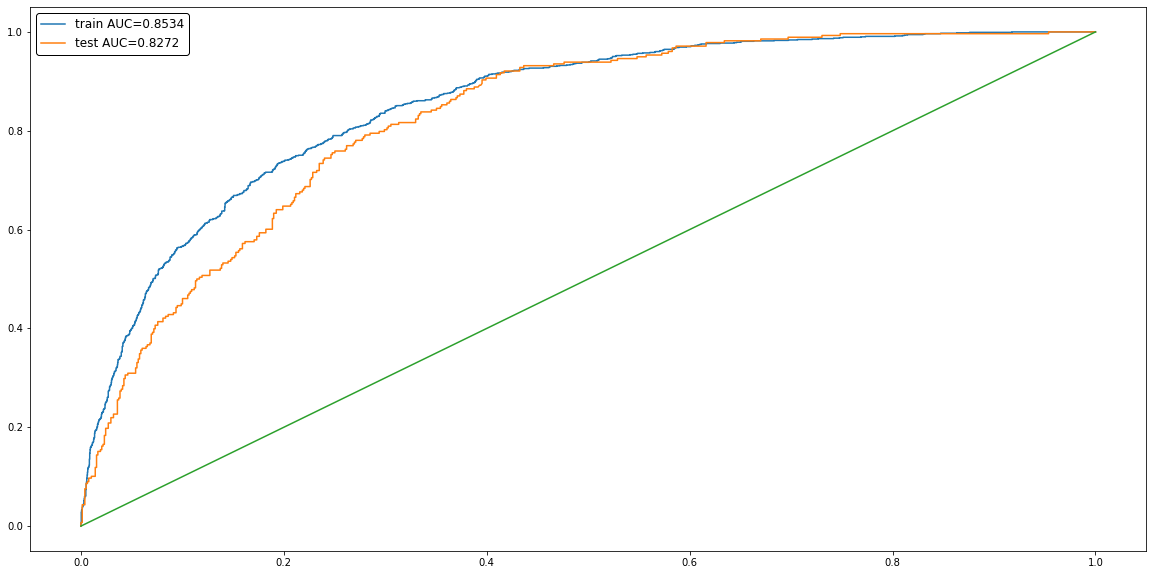

In [29]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(20,10))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [30]:
#Лучшее качество AUC = 0.8272 с параметром  С = 10

In [31]:
best_model1 = model

In [32]:
X_test = pd.read_csv('C:/Users/Михаил/Downloads/test.csv')
X_test['TotalSpent'] = data['TotalSpent'].replace(' ')
num_cols_scaled1 = pd.DataFrame(scaler.fit_transform(X_test[num_cols]))
dummy_features1 = pd.get_dummies(X_test[cat_cols])
X= pd.concat([num_cols_scaled1, dummy_features1], axis=1)
submission = pd.read_csv('C:/Users/Михаил/Downloads/submission.csv')
submission['Churn'] = best_model1.predict(X)
submission = submission.set_index('Id')
submission.to_csv('C:/Users/Михаил/Downloads/my_submission1.csv')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [33]:
import catboost

In [34]:
X_train_origin, X_test_origin, _, _ = train_test_split(X_origin.values, y.values, 
                                                       train_size=0.8, 
                                                       random_state=42)

In [35]:
categorical_indices = np.array([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
categorial_data = data[data.columns[categorical_indices]]

In [36]:
model = catboost.CatBoostClassifier(cat_features=categorical_indices)
params = {"n_estimators": np.array(np.linspace(100, 600, 5)), 'learning_rate':np.array(np.linspace(0.01, 0.2, 15))}
clf = GridSearchCV(model, params, scoring='roc_auc', n_jobs=-1)
clf.fit(X_train_origin, y_train)
clf.best_params_

0:	learn: 0.6644809	total: 179ms	remaining: 17.7s
1:	learn: 0.6390114	total: 189ms	remaining: 9.27s
2:	learn: 0.6162058	total: 198ms	remaining: 6.4s
3:	learn: 0.5964218	total: 206ms	remaining: 4.95s
4:	learn: 0.5804490	total: 215ms	remaining: 4.08s
5:	learn: 0.5654853	total: 222ms	remaining: 3.48s
6:	learn: 0.5511764	total: 231ms	remaining: 3.07s
7:	learn: 0.5387564	total: 242ms	remaining: 2.78s
8:	learn: 0.5282176	total: 251ms	remaining: 2.54s
9:	learn: 0.5181906	total: 260ms	remaining: 2.34s
10:	learn: 0.5088778	total: 266ms	remaining: 2.15s
11:	learn: 0.5001343	total: 272ms	remaining: 1.99s
12:	learn: 0.4929526	total: 275ms	remaining: 1.84s
13:	learn: 0.4858851	total: 281ms	remaining: 1.73s
14:	learn: 0.4789649	total: 289ms	remaining: 1.64s
15:	learn: 0.4725398	total: 297ms	remaining: 1.56s
16:	learn: 0.4669528	total: 305ms	remaining: 1.49s
17:	learn: 0.4617860	total: 313ms	remaining: 1.43s
18:	learn: 0.4580666	total: 317ms	remaining: 1.35s
19:	learn: 0.4539553	total: 324ms	remainin

{'learning_rate': 0.07785714285714285, 'n_estimators': 100.0}

In [37]:
y_train_predicted = clf.predict_proba(X_train_origin)[:, 1]
y_test_predicted = clf.predict_proba(X_test_origin)[:, 1]

In [38]:
boosting_model = catboost.CatBoostClassifier(n_estimators=100,
                                             learning_rate = 0.07785714285714285, 
                                             cat_features=categorical_indices)

boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

0:	learn: 0.6644809	total: 8.03ms	remaining: 795ms
1:	learn: 0.6390114	total: 16ms	remaining: 784ms
2:	learn: 0.6162058	total: 24.1ms	remaining: 778ms
3:	learn: 0.5964218	total: 32ms	remaining: 767ms
4:	learn: 0.5804490	total: 40.4ms	remaining: 767ms
5:	learn: 0.5654853	total: 47.9ms	remaining: 750ms
6:	learn: 0.5511764	total: 56.1ms	remaining: 745ms
7:	learn: 0.5387564	total: 64.1ms	remaining: 737ms
8:	learn: 0.5282176	total: 72.1ms	remaining: 729ms
9:	learn: 0.5181906	total: 80.3ms	remaining: 723ms
10:	learn: 0.5088778	total: 84.7ms	remaining: 685ms
11:	learn: 0.5001343	total: 88.9ms	remaining: 652ms
12:	learn: 0.4929526	total: 92ms	remaining: 615ms
13:	learn: 0.4858851	total: 97.5ms	remaining: 599ms
14:	learn: 0.4789649	total: 105ms	remaining: 596ms
15:	learn: 0.4725398	total: 113ms	remaining: 595ms
16:	learn: 0.4669528	total: 121ms	remaining: 592ms
17:	learn: 0.4617860	total: 129ms	remaining: 590ms
18:	learn: 0.4580666	total: 133ms	remaining: 566ms
19:	learn: 0.4539553	total: 141ms

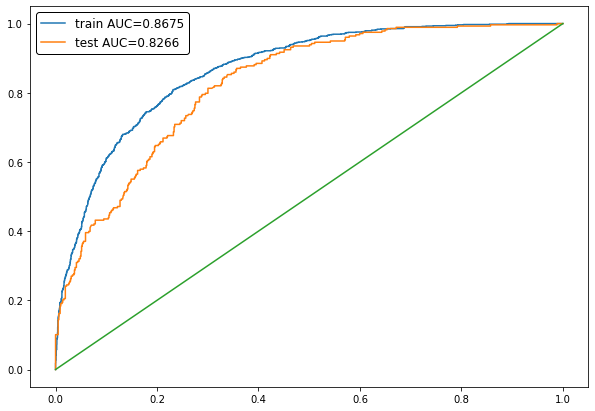

In [39]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [40]:
#Лучшее качество AUC = 0.8266 с параметром  learning_rate = 0.07785714285714285, n_estimators = 100

In [41]:
best_model = boosting_model

In [42]:
X_test = pd.read_csv('C:/Users/Михаил/Downloads/test.csv')
submission = pd.read_csv('C:/Users/Михаил/Downloads/submission.csv')
submission['Churn'] = best_model.predict(X_test)
submission = submission.set_index('Id')
submission.to_csv('C:/Users/Михаил/Downloads/my_submission.csv')

In [44]:
#На кагле показатель лучше у catboost, хотя тут оценка выше у LogisticRegression